In [361]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import Constant
from tqdm import tqdm
import numpy as np
import csv
import pandas as pd
import utils
import os

In [362]:
values = ['0.1ETH', '1ETH', '10ETH', '100ETH',  
          '100DAI', '1,000DAI', '10,000DAI', '100,000DAI',
          '100USDC', '1,000USDC',
          '100USDT', '1,000USDT',
          '0.1WBTC', '1WBTC', '10WBTC',
          '5,000cDAI', '50,000cDAI', '500,000cDAI', '5,000,000cDAI'
          ]
eth = ['0.1ETH', '1ETH', '10ETH', '100ETH']
token = ['100DAI', '1,000DAI', '10,000DAI', '100,000DAI',
          '100USDC', '1,000USDC',
          '100USDT', '1,000USDT',
          '0.1WBTC', '1WBTC', '10WBTC',
          '5,000cDAI', '50,000cDAI', '500,000cDAI', '5,000,000cDAI']
dai = ['100DAI', '1,000DAI', '10,000DAI', '100,000DAI']
usdc = ['100USDC', '1,000USDC']
usdt = ['100USDT', '1,000USDT']
wbtc = ['0.1WBTC', '1WBTC', '10WBTC']
cDai = ['5,000cDAI', '50,000cDAI', '500,000cDAI', '5,000,000cDAI']
asCnts = [24396,39882,36775,16936,
            306,883,2292,1801,
            208,607,
            457,723,
            109,251,301,
            5,17,24,43]

path = Constant.resultPath
type = ['heuristic','mode','mine']
res_dir = 'deanonymity_result.csv'
if os.path.exists(path+res_dir):
    cntdf = utils.readCsvFile(path+res_dir,0)
else:
    cntdf = pd.DataFrame(index = values)

In [363]:
resdf = cntdf[['Set','U-Heuristic','De-ASet-Heuristic','U_rule5','De-ASet_rule5','U_rule6','De-ASet_rule6','U-mode','De-ASet-mode','U_fp','De-ASet_fp','U_mine','De-ASet_mine']]
resdf['Heuristic'] = resdf['Set'] - resdf['De-ASet-Heuristic'] + resdf['U-Heuristic']
resdf['Mode'] = resdf['Set'] - resdf['De-ASet-mode'] + resdf['U-mode']
resdf['FP'] = resdf['Set'] - resdf['De-ASet_fp'] + resdf['U_fp']
resdf['Mine'] =resdf['Set'] - resdf['De-ASet_mine'] + resdf['U_mine']


figdf = resdf[['Set','Heuristic','Mode','FP','Mine']]
figdf.rename(columns={"Set":"原始匿名集","Heuristic":"行为分析启发式规则","Mode":"表层关联挖掘","FP":"深层关联挖掘","Mine":"关联挖掘技术"},inplace=True)
colorbox = ['#c82423','#f8ac8c','#2878b5','#8fbc8f','#e6cfe6']
hatchbox =['','','/////','','.....']
plt.rcParams["font.size"]=18
alp = 0.6

C:\Users\Yujia\AppData\Local\Temp\ipykernel_135356\4117557242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resdf['Heuristic'] = resdf['Set'] - resdf['De-ASet-Heuristic'] + resdf['U-Heuristic']
C:\Users\Yujia\AppData\Local\Temp\ipykernel_135356\4117557242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resdf['Mode'] = resdf['Set'] - resdf['De-ASet-mode'] + resdf['U-mode']
C:\Users\Yujia\AppData\Local\Temp\ipykernel_135356\4117557242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

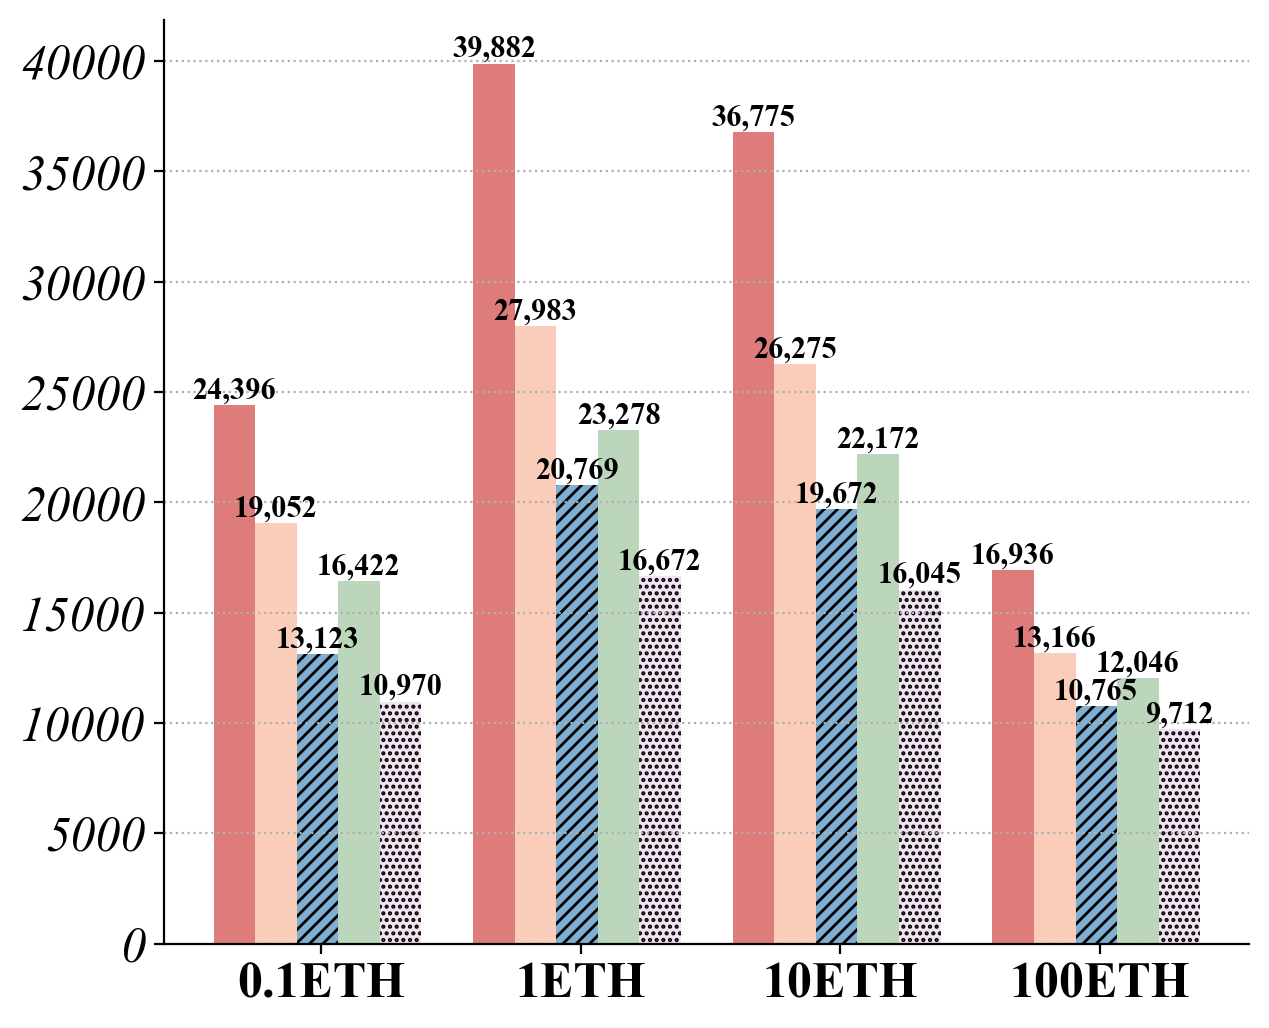

In [377]:
plt.figure(figsize=(7,6), dpi=200)
ethdf = figdf.loc[eth]

#计算有多少个列
len_spe = len(ethdf.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(ethdf.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = ethdf.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = ethdf[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=alp, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , ethdf.index,fontweight='bold')
plt.yticks(fontstyle='italic')
#添加图例
# plt.legend(ethdf.columns,fontsize=12,loc='upper right')
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


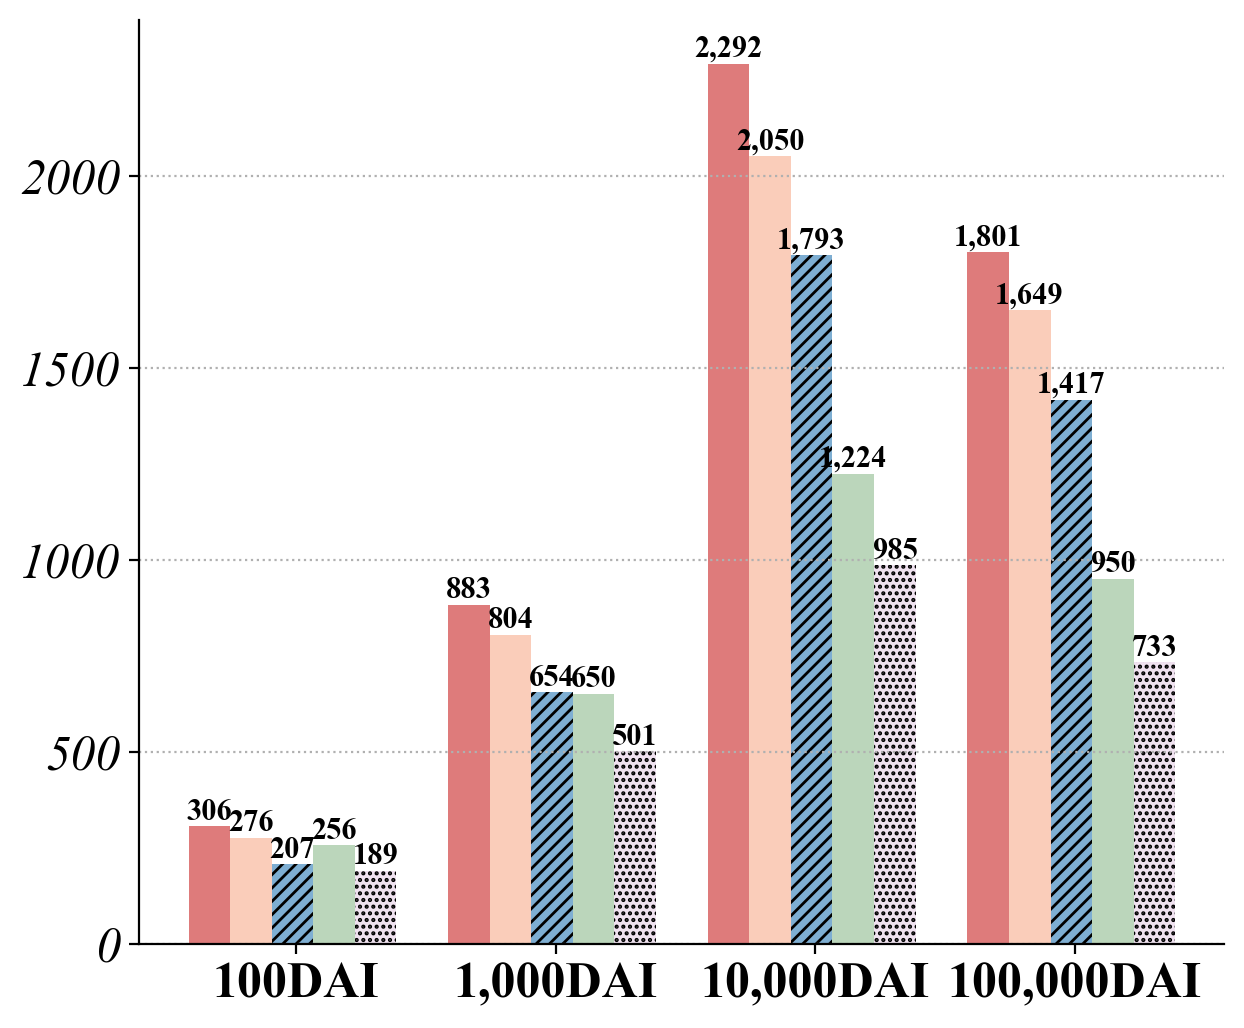

In [378]:
plt.figure(figsize=(7,6), dpi=200)
df = figdf.loc[dai]

#计算有多少个列
len_spe = len(df.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(df.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = df.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = df[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=0.6, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , df.index, fontweight='bold')
plt.yticks(fontstyle='italic')
#添加图例
# plt.legend(df.columns,fontsize=12,loc='upper left')
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


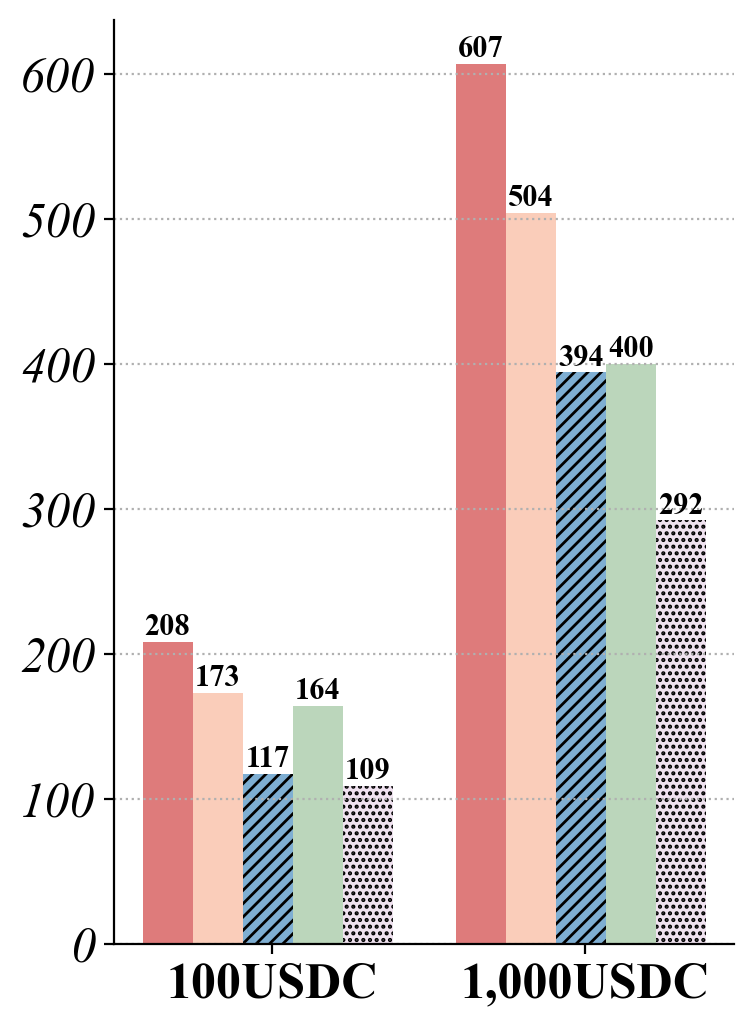

In [379]:
plt.figure(figsize=(4,6), dpi=200)
df = figdf.loc[usdc]

#计算有多少个列
len_spe = len(df.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(df.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = df.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = df[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=alp, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , df.index, fontweight='bold')
plt.yticks(fontstyle='italic')
#添加图例
# plt.legend(df.columns,fontsize=9,loc='upper left')
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


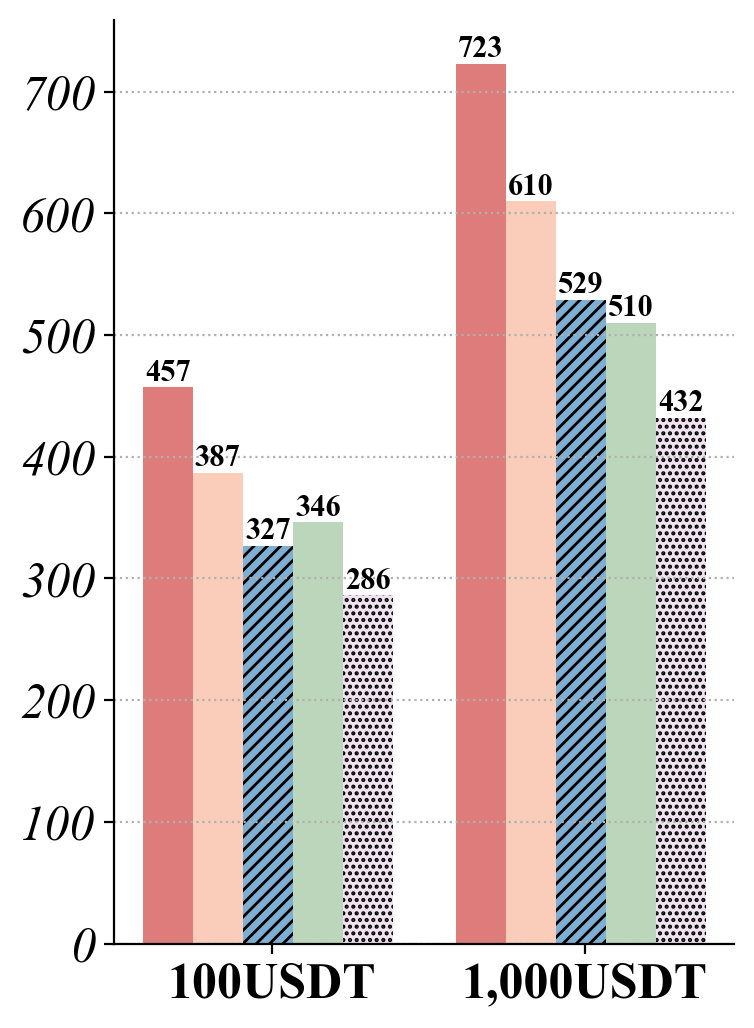

In [381]:
plt.figure(figsize=(4,6), dpi=200)
df = figdf.loc[usdt]

#计算有多少个列
len_spe = len(df.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(df.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = df.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = df[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=alp, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , df.index, fontweight='bold')
plt.yticks(fontstyle='italic')
#添加图例
# plt.legend(df.columns,fontsize=9,loc='upper left')
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


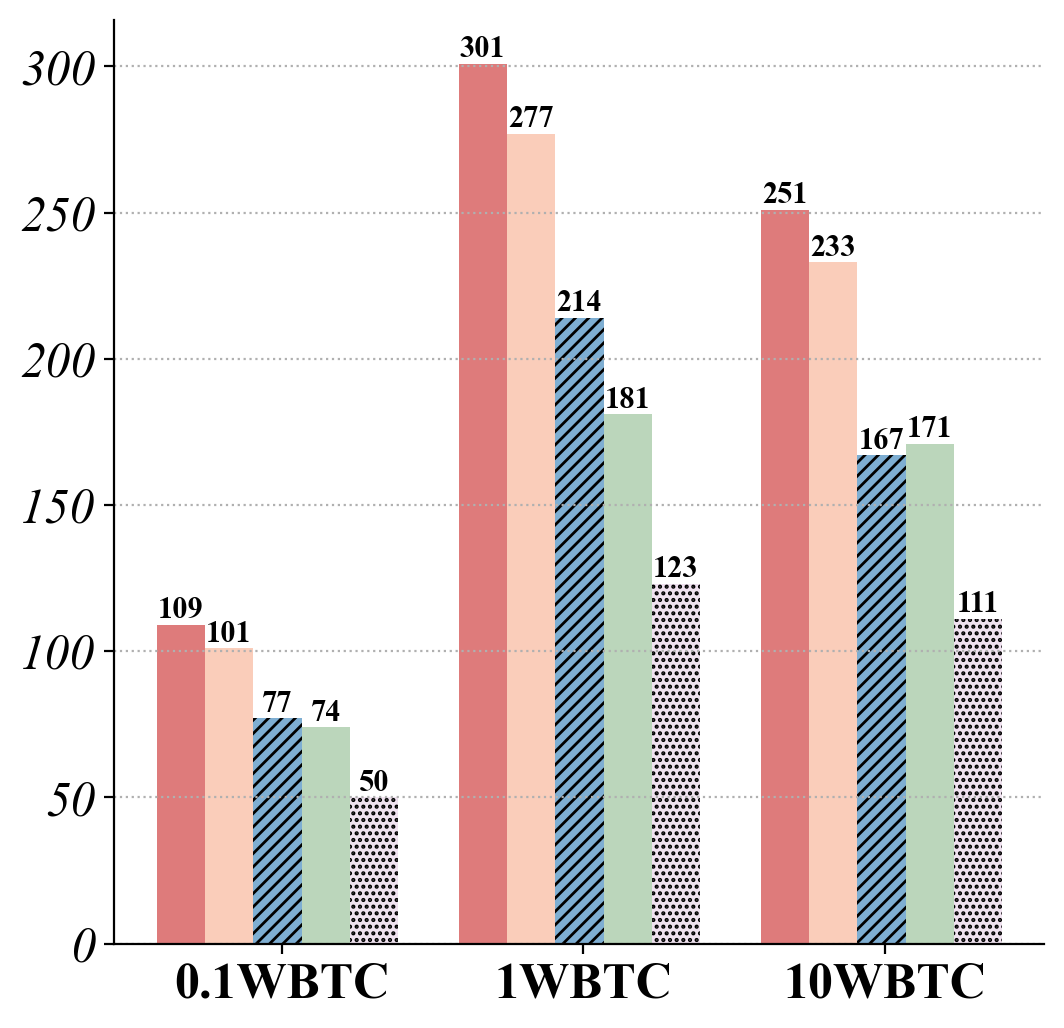

In [382]:
plt.figure(figsize=(6,6), dpi=200)
df = figdf.loc[wbtc]

#计算有多少个列
len_spe = len(df.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(df.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = df.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = df[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=alp, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , df.index, fontweight='bold')
plt.yticks(fontstyle='italic')
#添加图例
# plt.legend(df.columns,fontsize=9,loc='upper left')
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


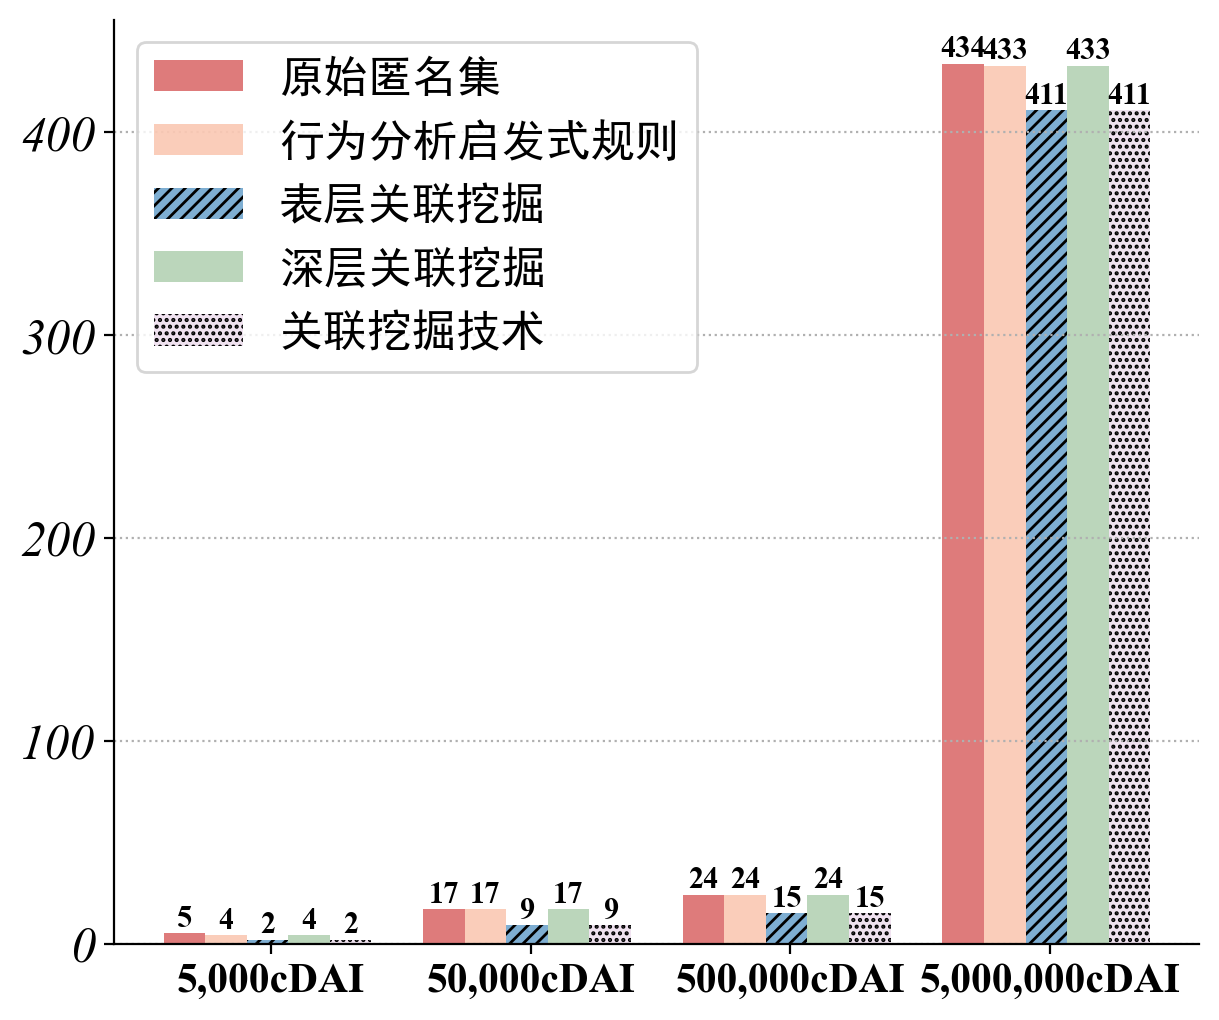

In [383]:
plt.figure(figsize=(7,6), dpi=200)
df = figdf.loc[cDai]

#计算有多少个列
len_spe = len(df.count())
#计算有多少行, 并生成一个步进为1的数组
index = np.arange(len(df.index))
#设置每组总宽度
total_width= 1.2
#求出每组每列宽度
width = total_width/len_spe
#对每个字段进行遍历
for i in range(len_spe):
    #得出每个字段的名称
    het = df.columns[i]
    #求出每个字段所包含的数组, 也就是对应的高度
    y_values = df[het]
    #设置x轴标签
    x_tables = index * 1.5 + i*width
    #绘制柱形图
    plt.bar(x_tables, y_values, width =width, color = colorbox[i], alpha=alp, hatch=hatchbox[i])
    #通过zip接收(x_tables,y_values),返回一个可迭代对象, 每一个元素都是由(x_tables,y_values)组成的元组.
    for x, y in zip(x_tables, y_values):
    #通过text()方法设置数据标签, 位于柱形中心, 最顶部, 字体大小为10.5
        plt.text(x, y ,'{:,.0f}'.format(y) ,ha='center', va='bottom', fontsize=11, fontweight='demibold')
#设置x轴刻度标签位置
index1 = index * 1.5 + 1/2
#通过xticks设置x轴标签为df_gbsp的索引
plt.xticks(index1 , df.index,fontweight='bold',fontsize=15)
plt.yticks(fontstyle='italic')
#添加图例
plt.legend(df.columns,fontsize=16,loc='upper left')
#网格线
plt.grid(axis='y',linestyle=':')

ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
plt.show()


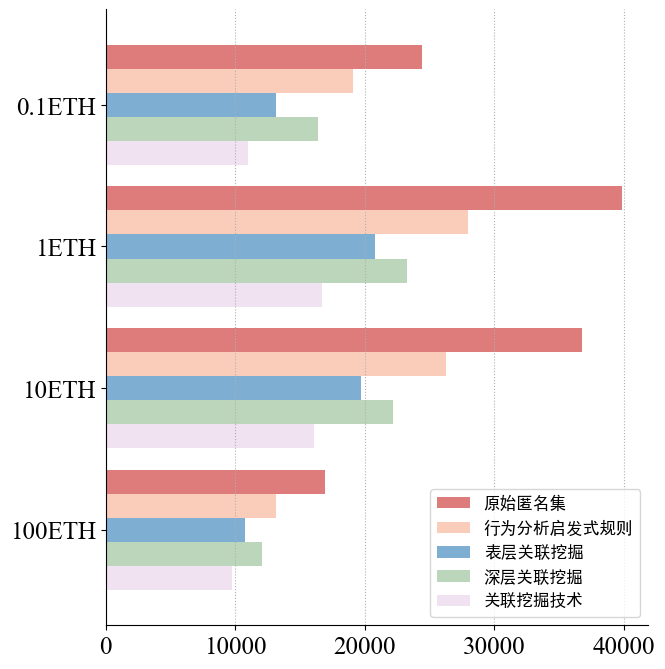

In [372]:
ethdf = figdf.loc[eth]

bars = ethdf.plot.barh(figsize=(7,8), color=colorbox, alpha=0.6, width=0.85)
# hatch_map = ['','','/','&','']
# for bar,mark in zip(bars,hatch_map):
#     bar.set_hatch(mark)
#网格线
plt.grid(axis='x',linestyle=':')

ax = plt.gca()
plt.legend(fontsize=12,loc='lower right')
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
#翻转
ax.invert_yaxis()
plt.show()